Instalación librerías

In [15]:
%pip install matplotlib missingno nhanes numpy pandas scipy seaborn session_info scikit-learn statsmodels pyjanitor

Note: you may need to restart the kernel to use updated packages.


In [16]:
import janitor  # This should work with the correct package installed
import matplotlib.pyplot as plt
import missingno as msno
import nhanes.load
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import session_info
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets 

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import set_config

import warnings
warnings.filterwarnings('ignore')


In [17]:
%run pandas-missing-extension.ipynb

**Imputación para series de tiempo**

In [18]:
airquality_df = (sm.datasets.get_rdataset('airquality')
                  .data.clean_names(case_type = 'snake')
                  .add_column('year',1973)
                  .assign(date = lambda df: pd.to_datetime(df[['year','month','day']]))
                  .sort_values(by = 'date')
                  .set_index('date'))
airquality_df

,ozone,solar_r,wind,temp,month,day,year
date,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973
1973-05-02,36.0,118.0,8.0,72,5,2,1973
1973-05-03,12.0,149.0,12.6,74,5,3,1973
1973-05-04,18.0,313.0,11.5,62,5,4,1973
1973-05-05,NaN,NaN,14.3,56,5,5,1973
...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973
1973-09-27,NaN,145.0,13.2,77,9,27,1973
1973-09-28,14.0,191.0,14.3,75,9,28,1973


**Imputación por llenado hacia atrás**

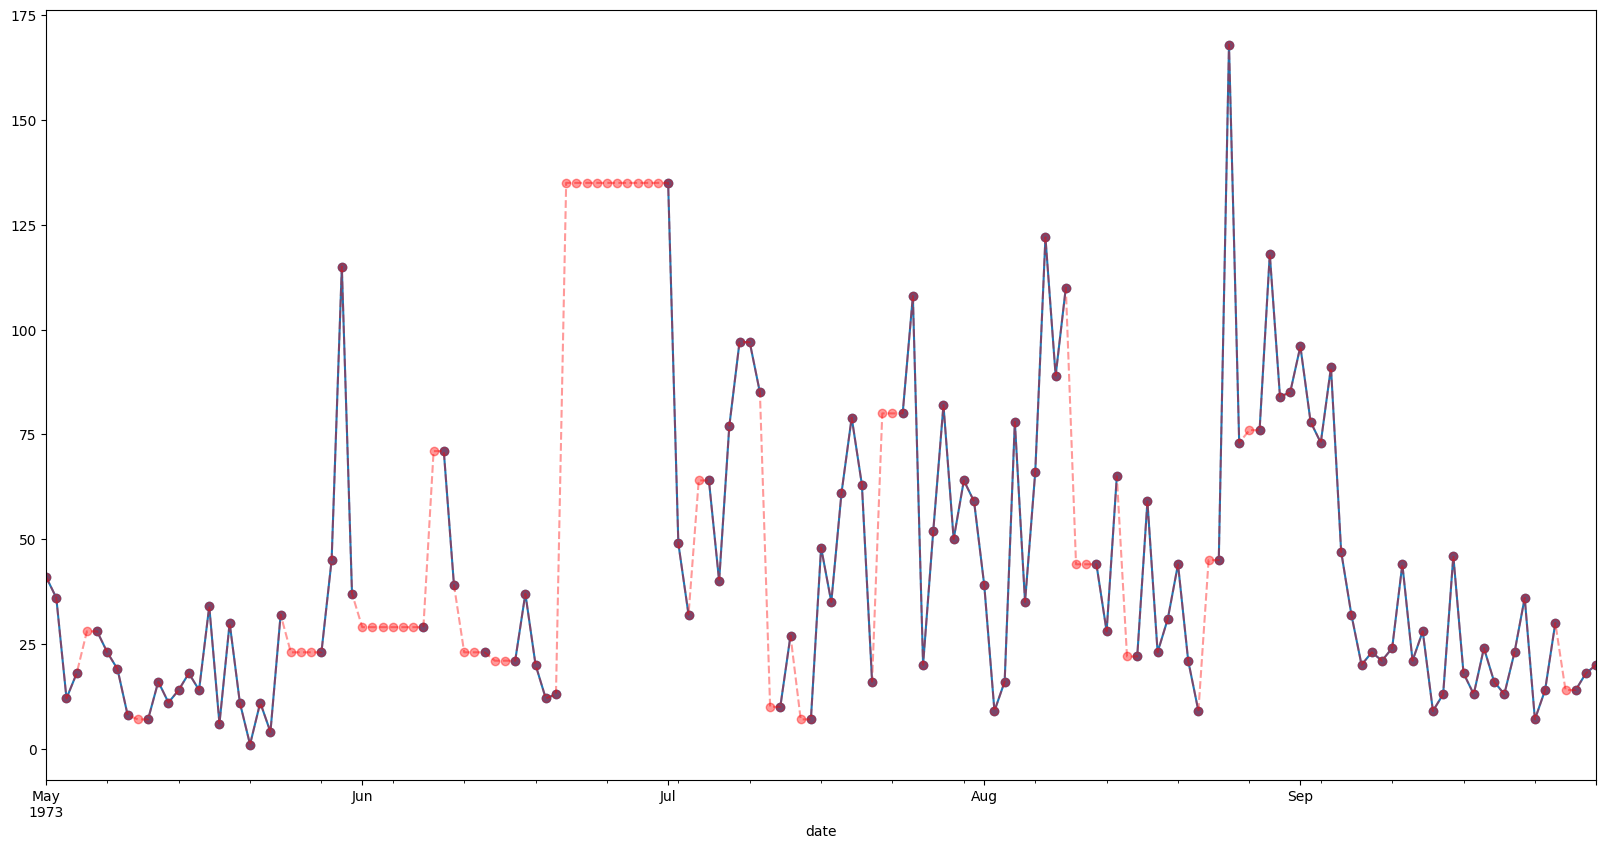

In [19]:
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.bfill().plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

**Imputación por llenado hacia adelante**

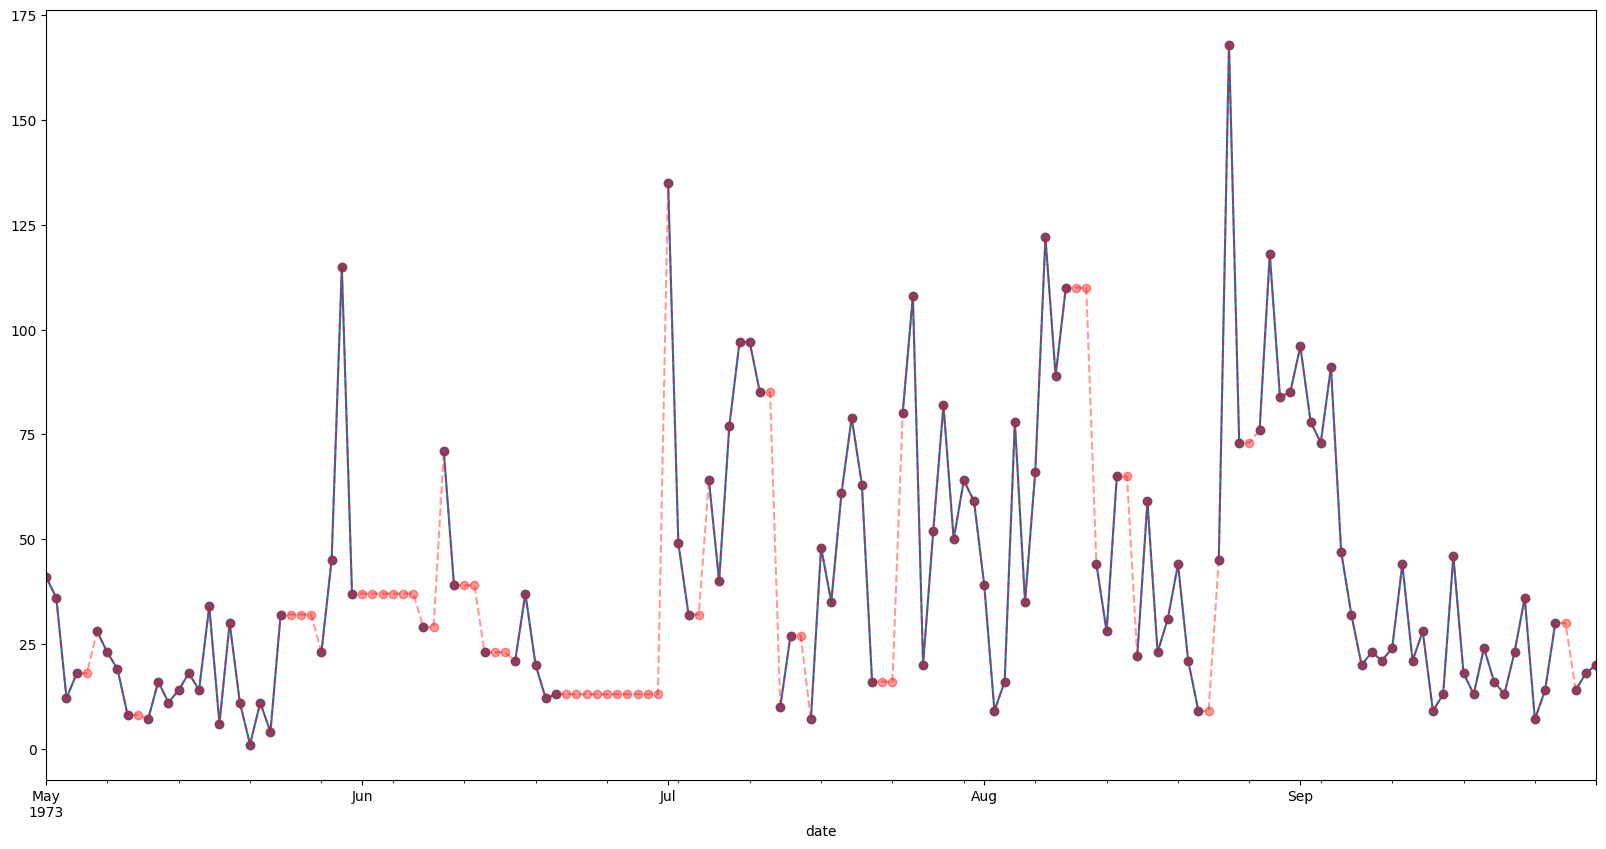

In [20]:
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.ffill().plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

**Imputación por interpolación**

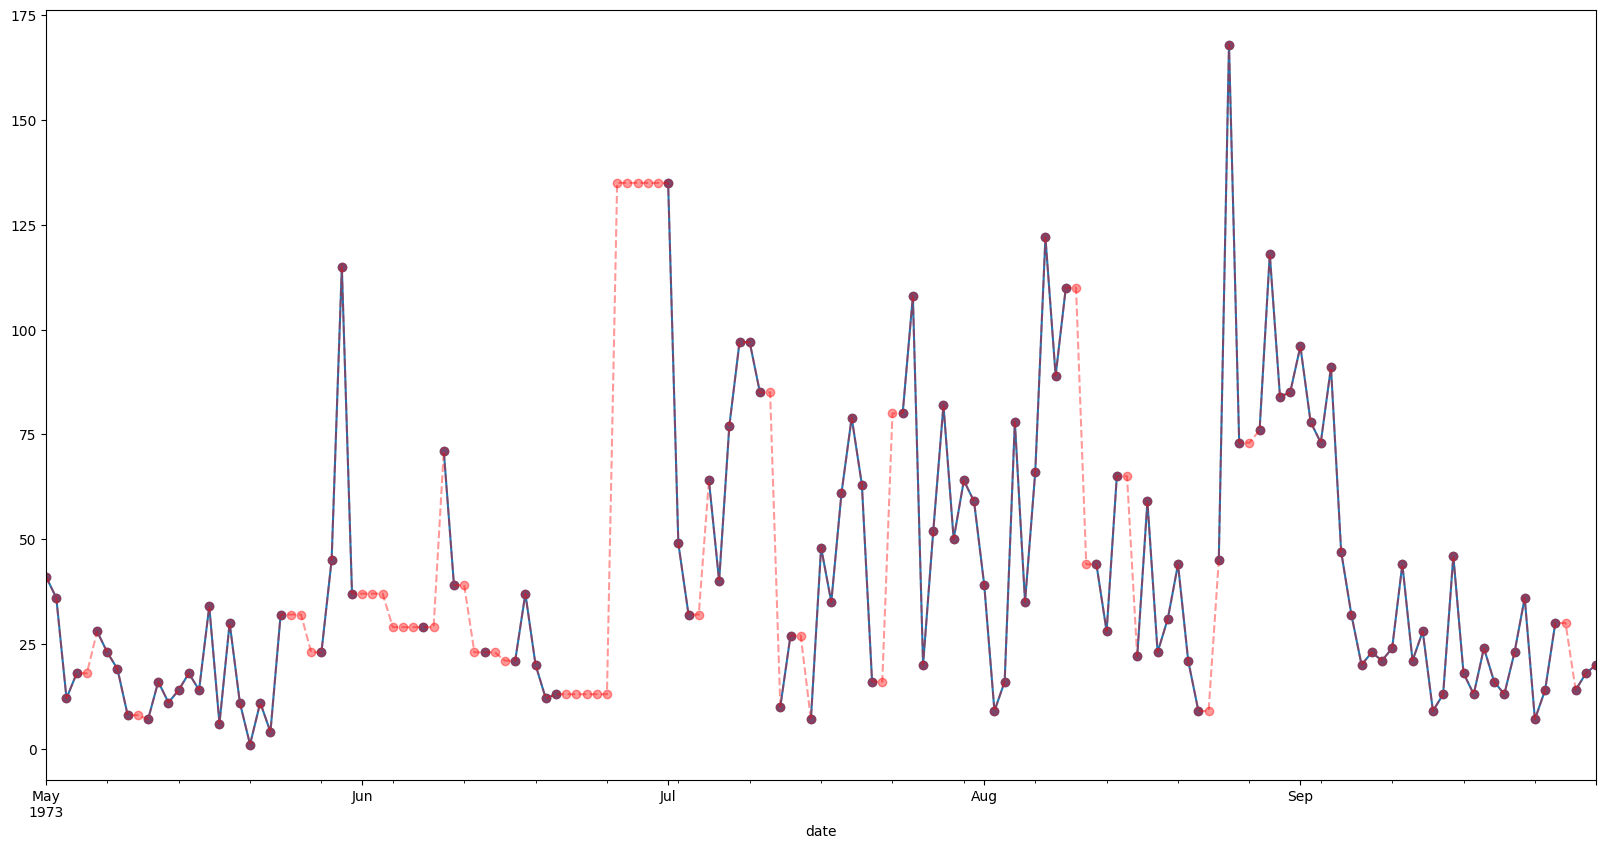

In [21]:
#Se pega al dato no nulo más cercano
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'nearest').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

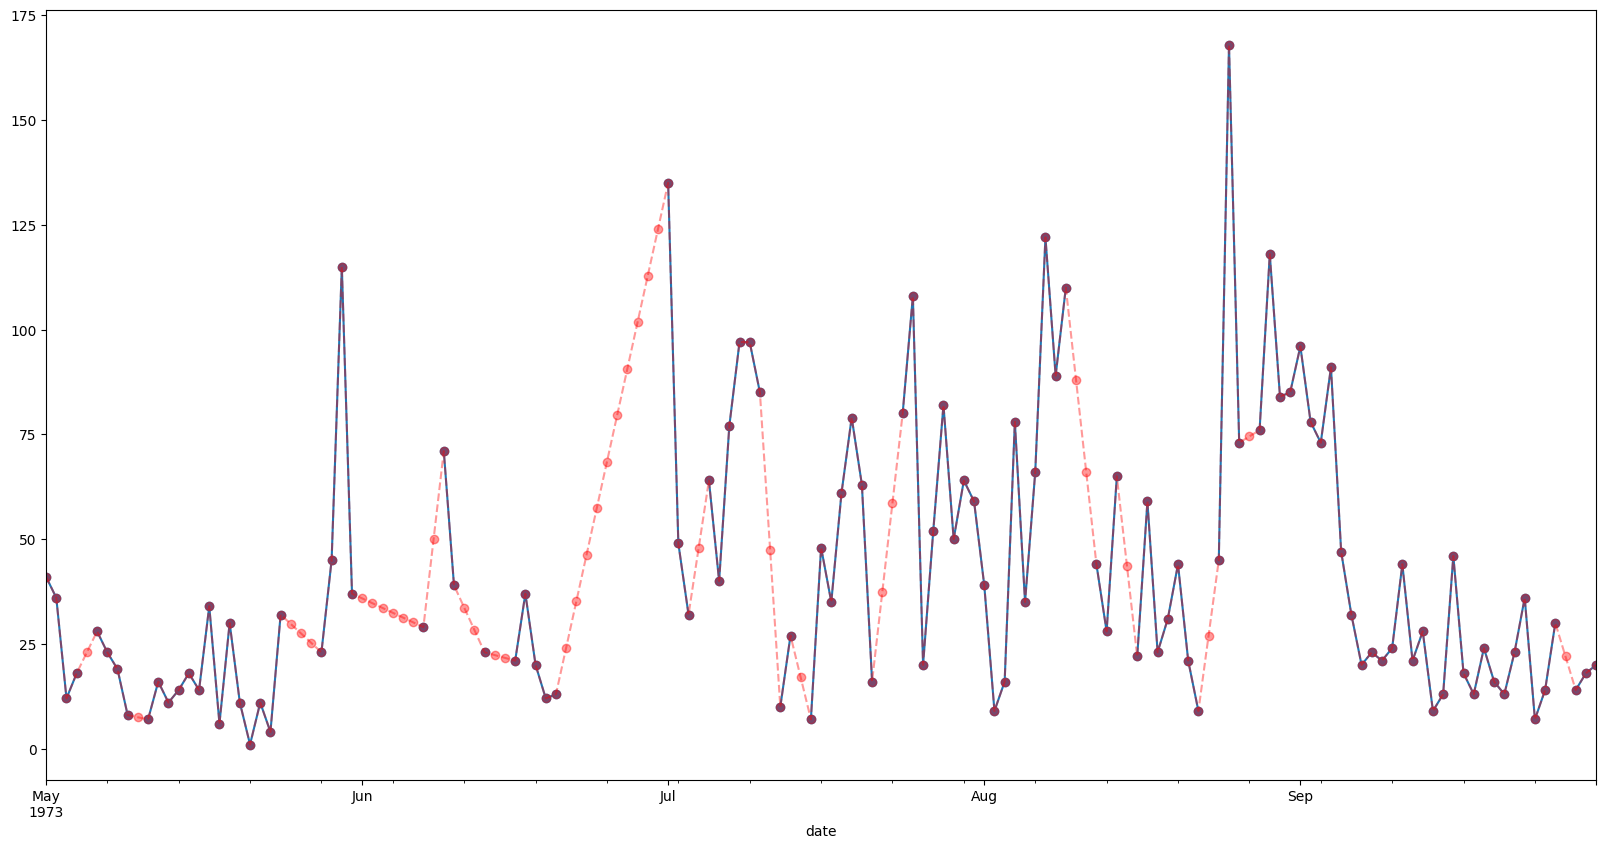

In [22]:
##Se pega al dato no a través de linea recta
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'linear').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

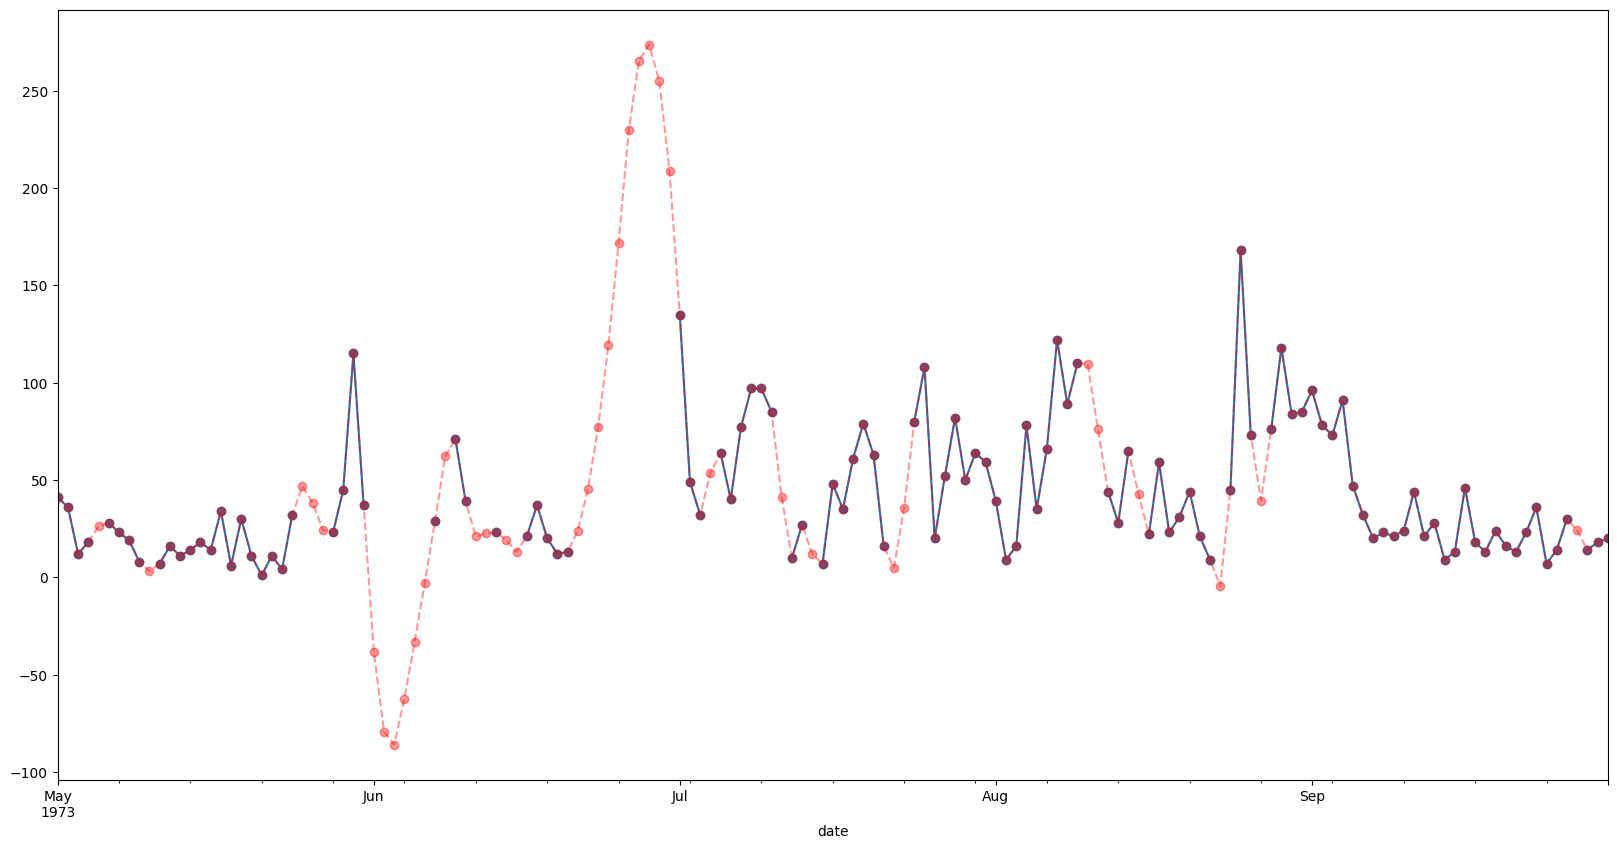

In [23]:
##Se pega al dato no a través de una ecuación cuadrática (segundo orden)
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'quadratic').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()
#lo que tiene es que dependiendo de los datos puede generar datos negativos

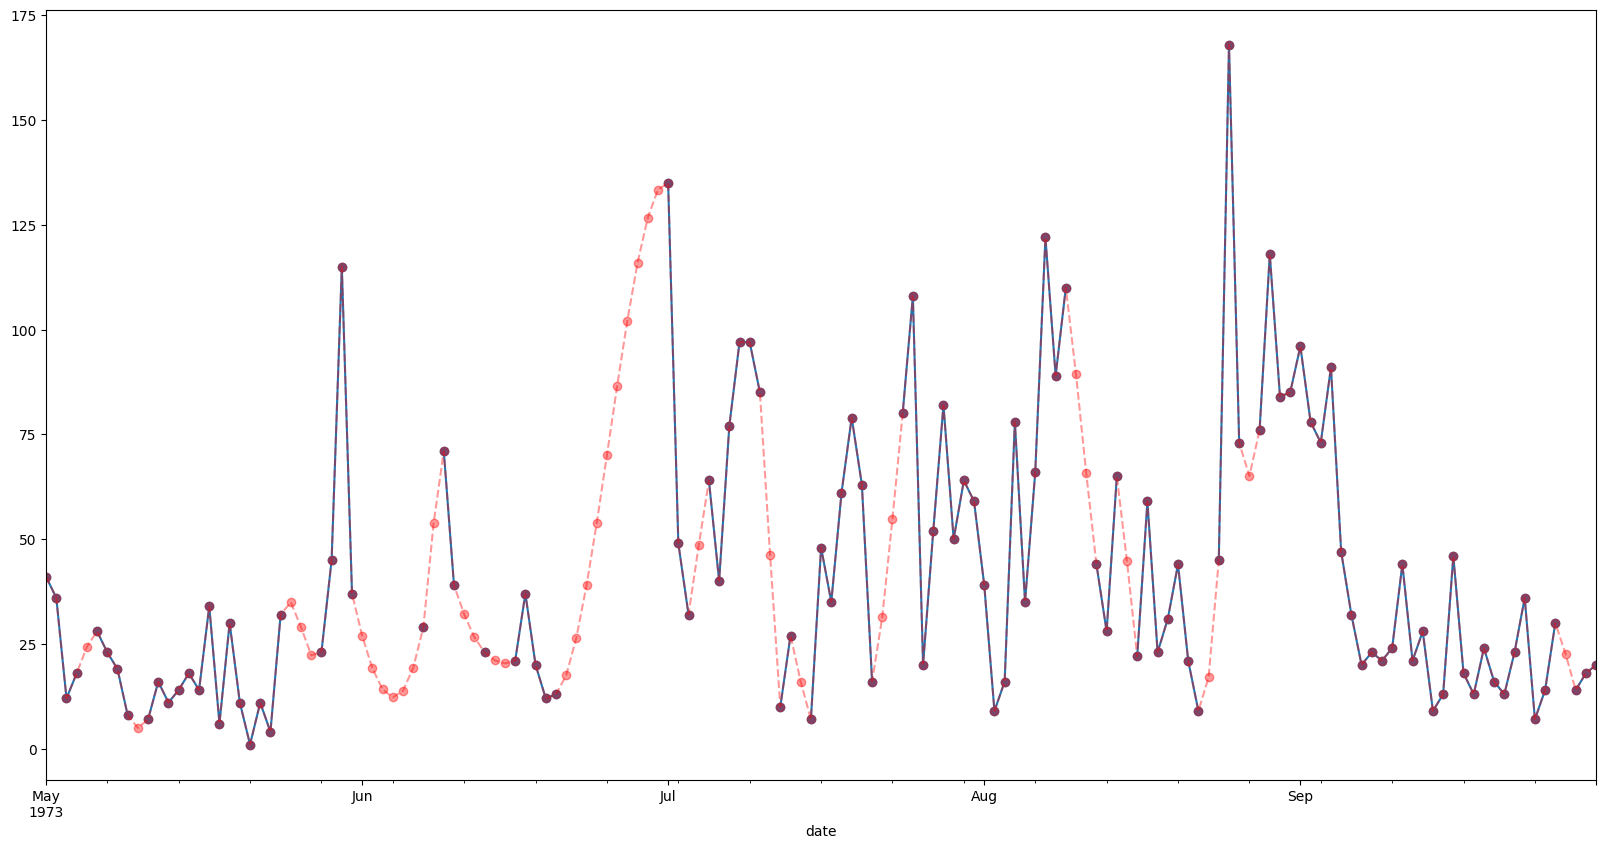

In [24]:
##Suaviza la linea hasta el próximo dato no nulo
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'akima').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

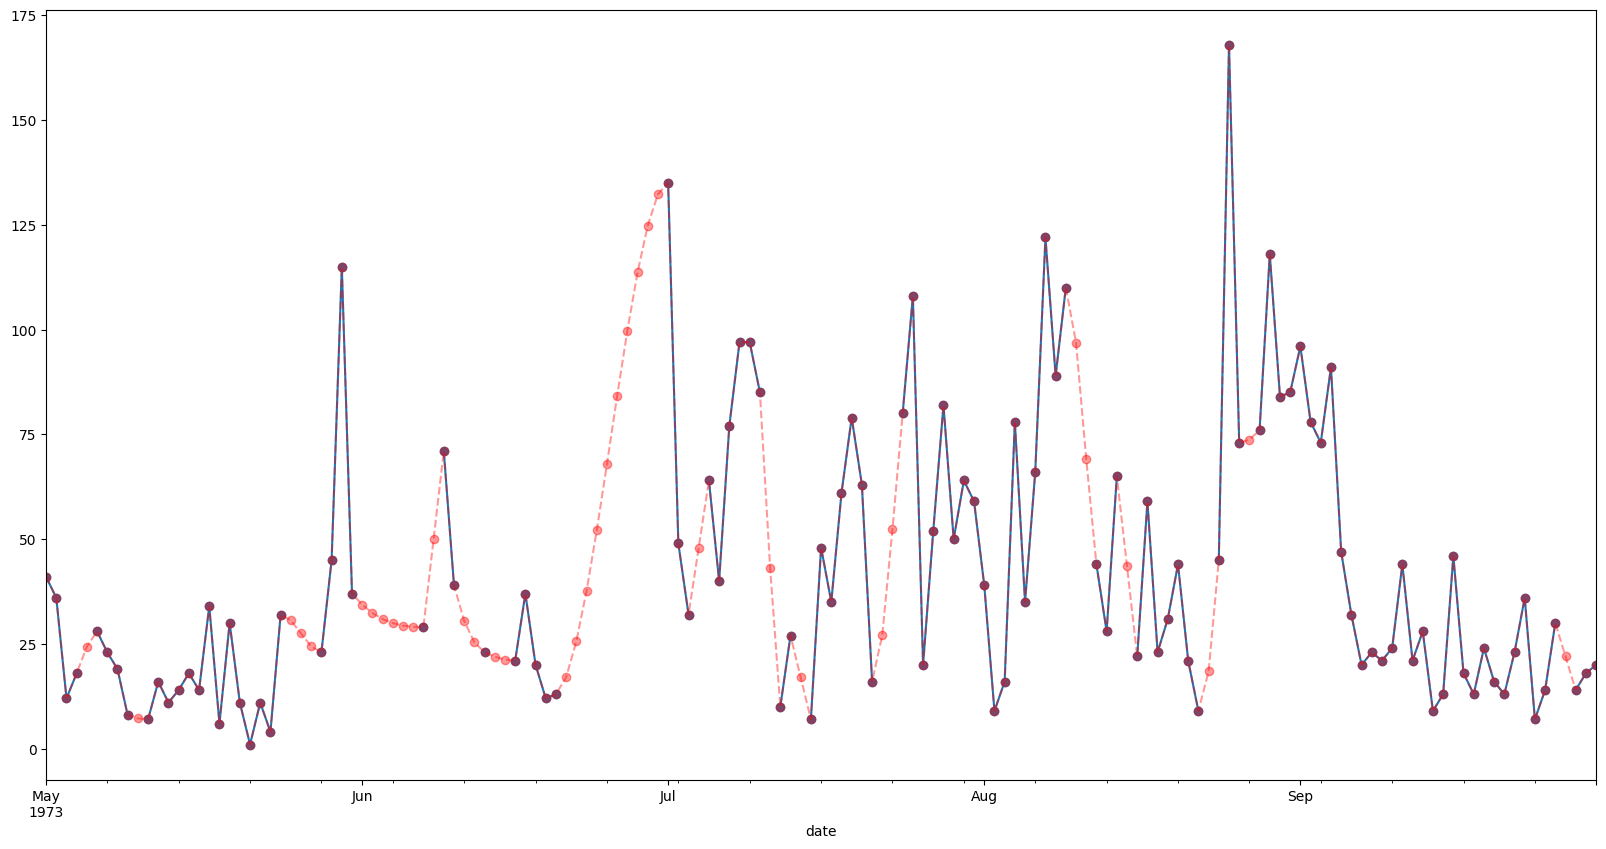

In [25]:
##Suaviza la linea hasta el próximo dato no nulo, pero hace una suavización más agresiva q en akima, 
# pero pchip castiga las tendencias negativas
plt.figure(figsize=(20, 10))
airquality_df.ozone.plot(marker = 'o')
airquality_df.ozone.interpolate(method= 'pchip').plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o')
plt.show()

In [26]:
airquality_df.ozone = airquality_df.ozone.interpolate(method = 'akima')
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1973-05-01 to 1973-09-30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ozone    153 non-null    float64
 1   solar_r  146 non-null    float64
 2   wind     153 non-null    float64
 3   temp     153 non-null    int64  
 4   month    153 non-null    int64  
 5   day      153 non-null    int64  
 6   year     153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 9.6 KB


<function matplotlib.pyplot.show(close=None, block=None)>

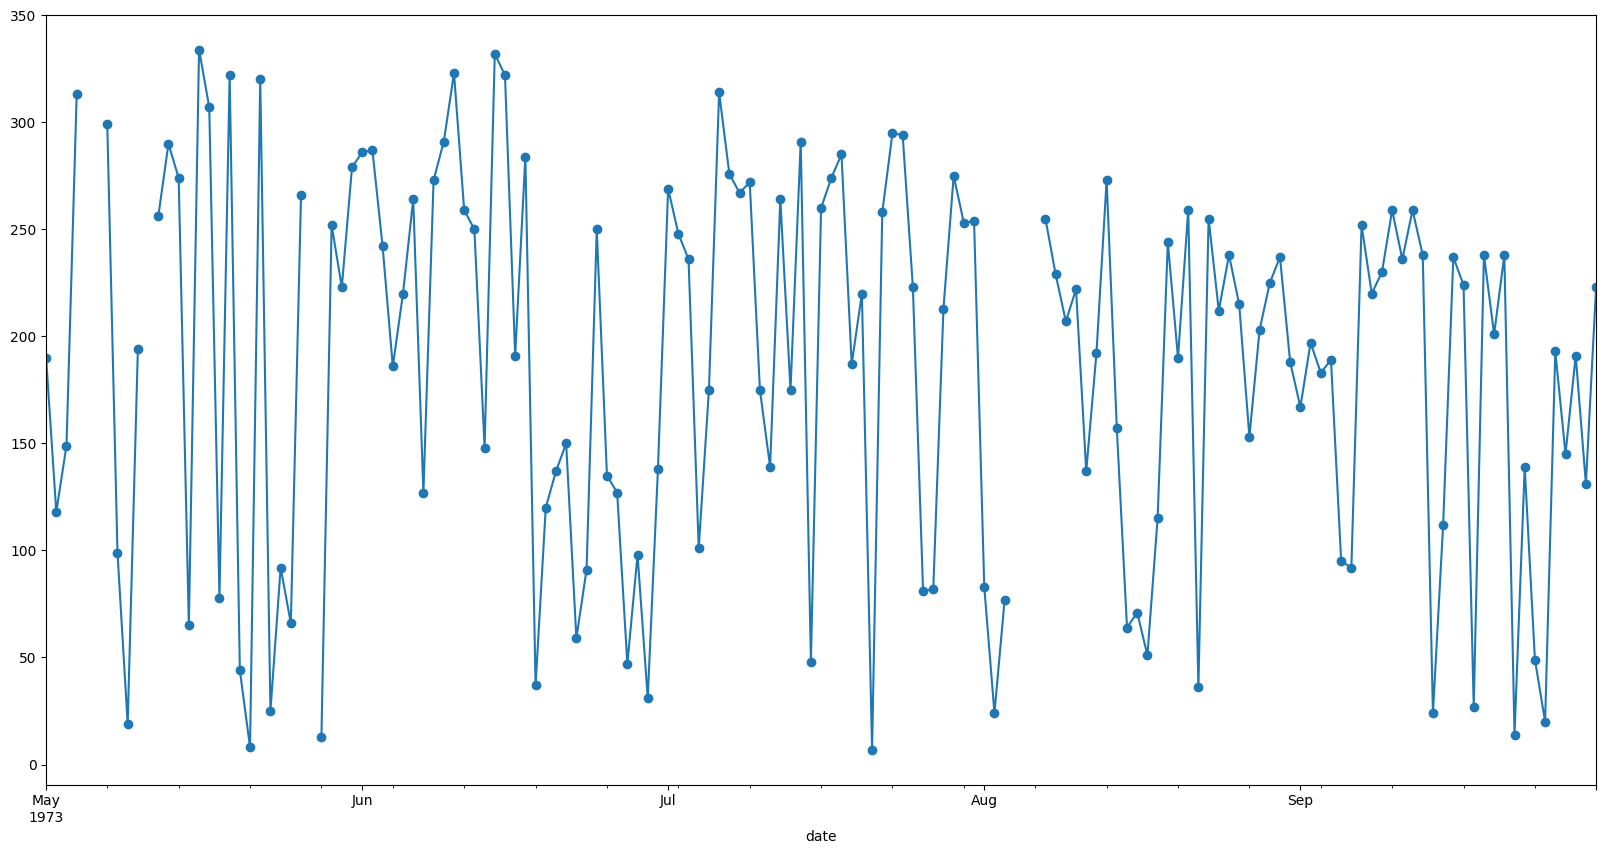

In [27]:
plt.figure(figsize=(20, 10))
airquality_df.solar_r.plot(marker = 'o')
plt.show

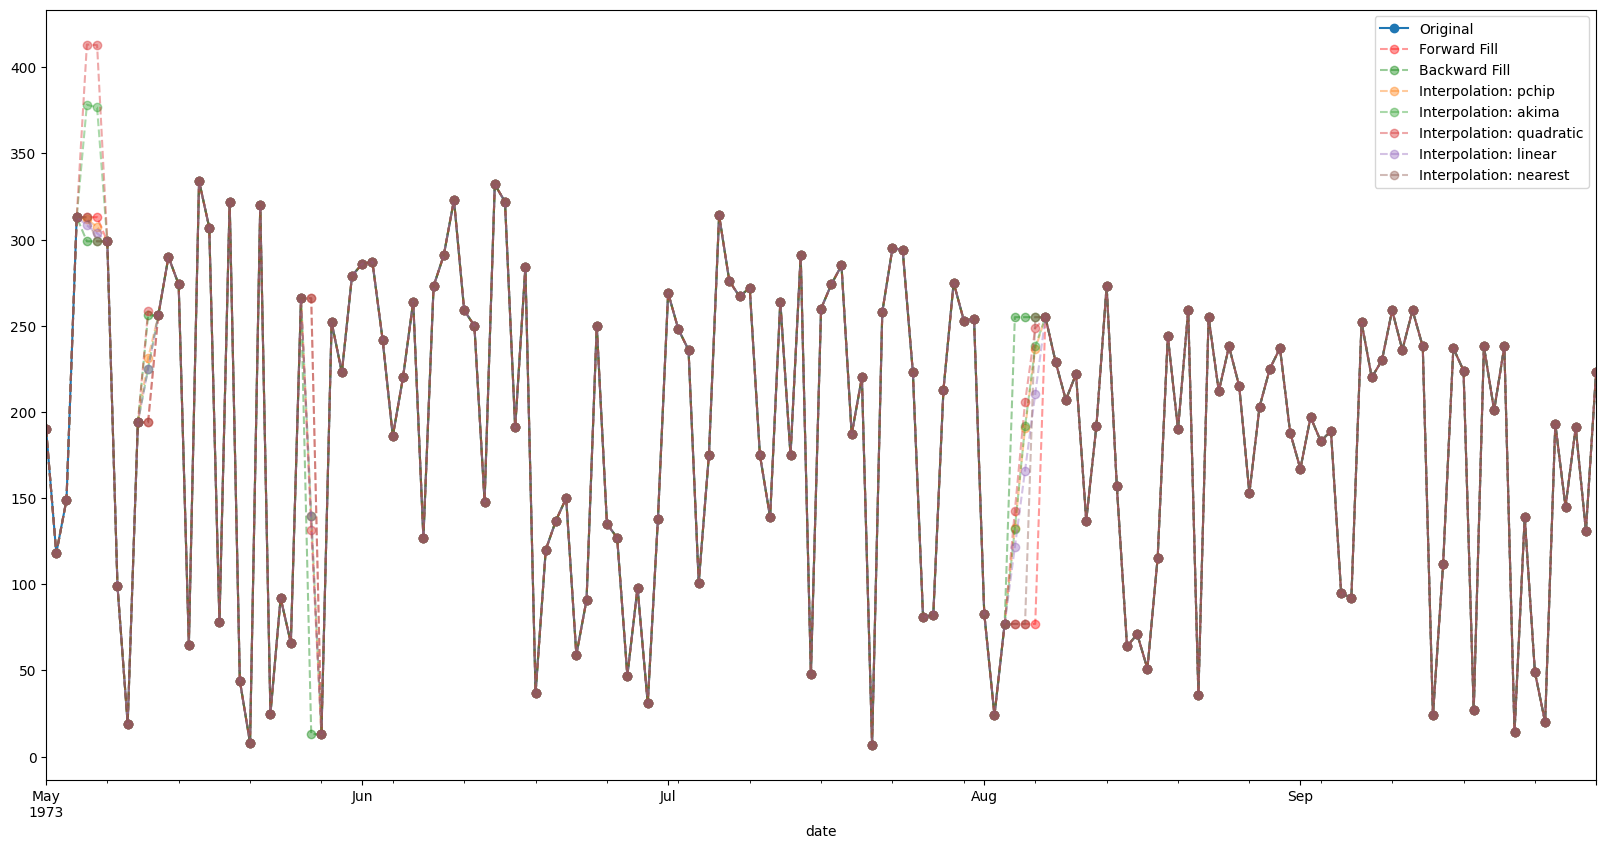

In [28]:
plt.figure(figsize=(20, 10))
airquality_df.solar_r.plot(marker = 'o', label = 'Original')
airquality_df.solar_r.ffill().plot(color = 'r', alpha = 0.4, ls = 'dashed', marker='o', label = 'Forward Fill')
airquality_df.solar_r.bfill().plot(color = 'g', alpha = 0.4, ls = 'dashed', marker='o', label = 'Backward Fill')

methods=['pchip','akima','quadratic','linear','nearest']
    
for method in methods:
    airquality_df.solar_r.interpolate(method = method).plot(alpha= 0.4, ls = 'dashed', marker='o', label = f'Interpolation: {method}')

plt.legend()
plt.show()
    

In [29]:
airquality_df.solar_r = airquality_df.solar_r.interpolate(method = 'pchip')
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1973-05-01 to 1973-09-30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ozone    153 non-null    float64
 1   solar_r  153 non-null    float64
 2   wind     153 non-null    float64
 3   temp     153 non-null    int64  
 4   month    153 non-null    int64  
 5   day      153 non-null    int64  
 6   year     153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 9.6 KB


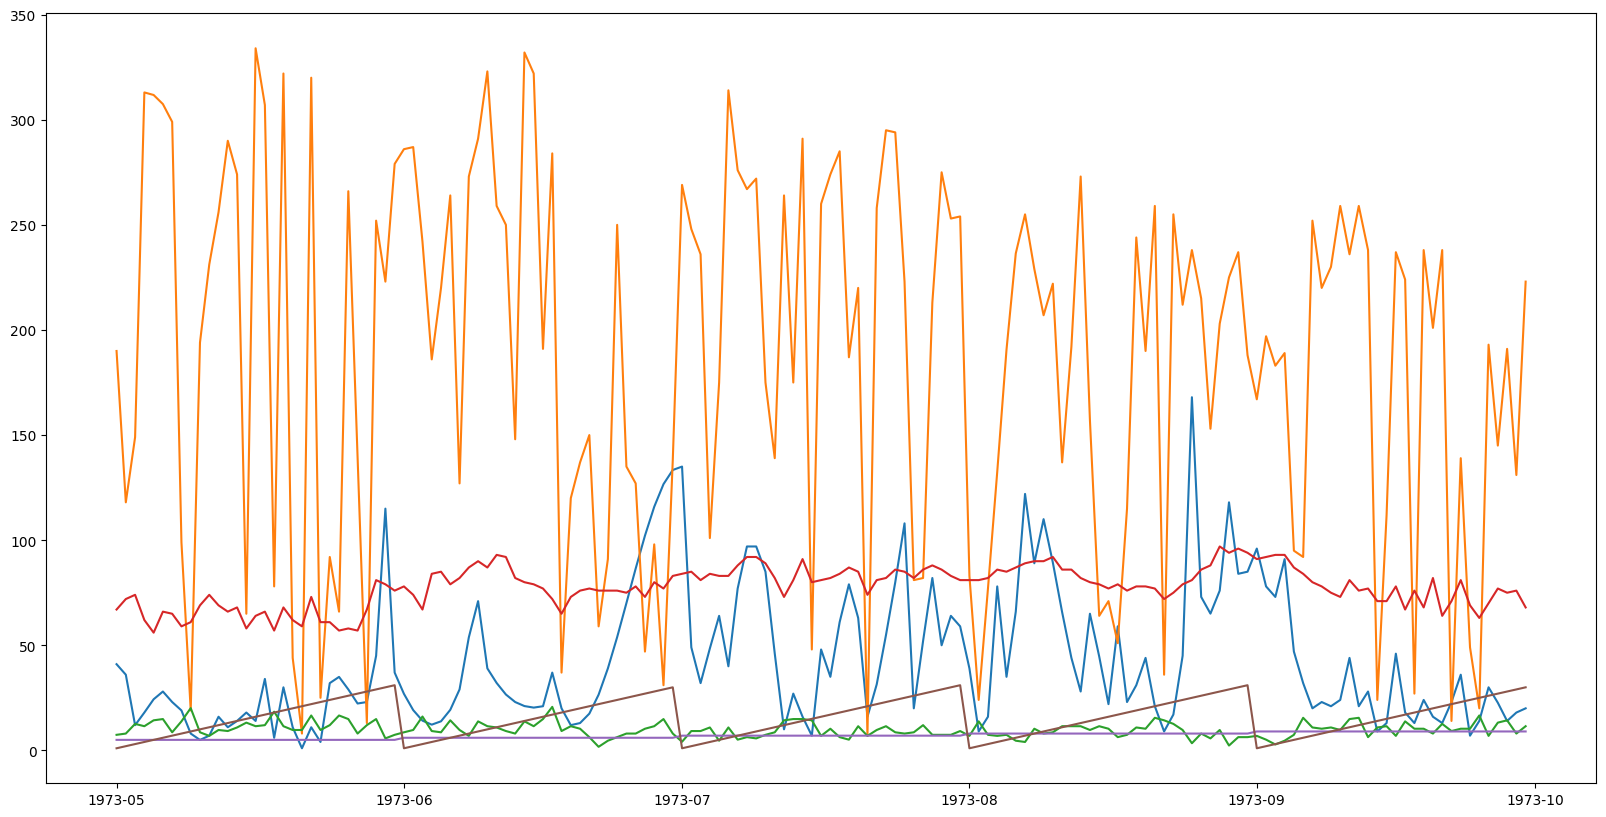

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(airquality_df.drop('year', axis=1))
plt.show()

**Imputación para estructuras de datos**

In [31]:
nhanes_raw_df = nhanes.load.load_NHANES_data(year = '2017-2018').clean_names(case_type = 'snake')
nhanes_raw_df.head()

,general_health_condition,ever_breastfed_or_fed_breastmilk,age_stopped_breastfeedingdays,age_first_fed_formuladays,age_stopped_receiving_formuladays,age_started_other_foodbeverage,age_first_fed_milkdays,type_of_milk_first_fed_whole_milk,type_of_milk_first_fed2_milk,type_of_milk_first_fed1_milk,...,days_smoked_cigs_during_past30_days,avg_cigarettesday_during_past30_days,tried_to_quit_smoking,times_stopped_smoking_cigarettes,how_long_were_you_able_to_stop_smoking,unit_of_measure_dayweekmonthyear_2_smq,current_selfreported_height_inches,current_selfreported_weight_pounds,tried_to_lose_weight_in_past_year,times_lost10_lbs_or_more_to_lose_weight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
nhanes_raw_df.shape

(8366, 197)

In [33]:
nhanes_selected = nhanes_raw_df.select_columns('general_health_condition', 
                                               'age_in_years_at_screening',
                                               'gender',
                                               'current_selfreported_weight_pounds',
                                               'current_selfreported_height_inches',
                                               'doctor_told_you_have_diabetes',
                                               '60_sec_pulse30_sec_pulse2',
                                               'total_cholesterol_mgdl').rename_columns({
'age_in_years_at_screening': 'age',
'current_selfreported_weight_pounds': 'weight',
'current_selfreported_height_inches': 'height',
'doctor_told_you_have_diabetes': 'diabetes',
'60_sec_pulse30_sec_pulse2': 'pulse',
'total_cholesterol_mgdl': 'cholesterol'
})

nhanes_selected.head()

,general_health_condition,age,gender,weight,height,diabetes,pulse,cholesterol
SEQN,,,,,,,,
93703.0,NaN,2.0,Female,NaN,NaN,0,NaN,NaN
93704.0,NaN,2.0,Male,NaN,NaN,0,NaN,NaN
93705.0,Good,66.0,Female,165.0,63.0,0,52.0,157.0
93706.0,Very good,18.0,Male,145.0,68.0,0,82.0,148.0
93707.0,Good,13.0,Male,NaN,NaN,0,100.0,189.0


In [34]:
##Cantidas de columnas 
nhanes_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8366 entries, 93703.0 to 102956.0
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   general_health_condition  5964 non-null   object 
 1   age                       8366 non-null   float64
 2   gender                    8366 non-null   object 
 3   weight                    5828 non-null   float64
 4   height                    5776 non-null   float64
 5   diabetes                  8362 non-null   object 
 6   pulse                     6742 non-null   float64
 7   cholesterol               6738 non-null   float64
dtypes: float64(5), object(3)
memory usage: 588.2+ KB


In [35]:
#Comportamiento estadístico de las variables
##Medidas de tendencia central
##Medidas de posición
##Medidas de dispersión
nhanes_selected.describe()

,age,weight,height,pulse,cholesterol
count,8366.000000,5828.000000,5776.000000,6742.000000,6738.000000
mean,35.830026,350.995710,272.224030,73.749926,179.894627
std,24.905061,1280.908078,1414.518896,12.380546,40.602248
min,1.000000,72.000000,49.000000,34.000000,76.000000
25%,12.000000,145.000000,63.000000,66.000000,151.000000
50%,33.000000,171.500000,66.000000,72.000000,176.000000
75%,59.000000,208.000000,70.000000,82.000000,204.000000
max,80.000000,9999.000000,9999.000000,136.000000,446.000000


In [36]:
nhanes_selected.height.value_counts()


height
66.0      540
64.0      514
65.0      469
62.0      459
67.0      446
63.0      421
68.0      397
70.0      374
69.0      365
71.0      317
61.0      289
72.0      257
60.0      226
73.0      156
9999.0    119
59.0      112
74.0      105
75.0       73
76.0       39
58.0       24
57.0       19
77.0       16
56.0       10
78.0        8
53.0        5
54.0        4
55.0        3
79.0        2
50.0        2
49.0        1
7777.0      1
81.0        1
82.0        1
51.0        1
Name: count, dtype: int64

In [37]:
nhanes_selected.describe(include = 'object')

,general_health_condition,gender,diabetes
count,5964,8366,8362
unique,5,2,3
top,Good,Female,0
freq,2454,4272,7334


In [38]:
#Desenmascarar los datos nulos
nhanes_selected = nhanes_selected.replace({'height': {9999:np.nan, 7777:np.nan},
                                           'weight': {7777:np.nan, 9999:np.nan}})
nhanes_selected.describe()

,age,weight,height,pulse,cholesterol
count,8366.000000,5724.000000,5656.000000,6742.000000,6738.000000
mean,35.830026,178.805556,66.249646,73.749926,179.894627
std,24.905061,48.688953,4.154477,12.380546,40.602248
min,1.000000,72.000000,49.000000,34.000000,76.000000
25%,12.000000,145.000000,63.000000,66.000000,151.000000
50%,33.000000,170.000000,66.000000,72.000000,176.000000
75%,59.000000,205.000000,69.000000,82.000000,204.000000
max,80.000000,484.000000,82.000000,136.000000,446.000000


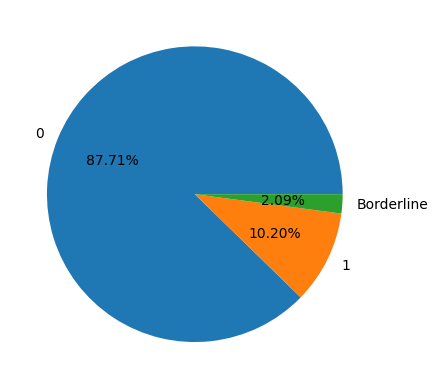

In [39]:
plt.pie(x = nhanes_selected.diabetes.value_counts(), labels = nhanes_selected.diabetes.value_counts().index,
        autopct = '%0.2f%%')#autopct es como quiero que me muestra los datos

plt.show()

In [40]:
nhanes_selected = nhanes_selected.replace({'diabetes': {'Borderline': np.nan}})
nhanes_selected.describe(include = 'object')

,general_health_condition,gender,diabetes
count,5964,8366,8187
unique,5,2,2
top,Good,Female,0
freq,2454,4272,7334


In [41]:
nhanes_selected.describe(include='all')

,general_health_condition,age,gender,weight,height,diabetes,pulse,cholesterol
count,5964,8366.000000,8366,5724.000000,5656.000000,8187,6742.000000,6738.000000
unique,5,NaN,2,NaN,NaN,2,NaN,NaN
top,Good,NaN,Female,NaN,NaN,0,NaN,NaN
freq,2454,NaN,4272,NaN,NaN,7334,NaN,NaN
mean,NaN,35.830026,NaN,178.805556,66.249646,NaN,73.749926,179.894627
std,NaN,24.905061,NaN,48.688953,4.154477,NaN,12.380546,40.602248
min,NaN,1.000000,NaN,72.000000,49.000000,NaN,34.000000,76.000000
25%,NaN,12.000000,NaN,145.000000,63.000000,NaN,66.000000,151.000000
50%,NaN,33.000000,NaN,170.000000,66.000000,NaN,72.000000,176.000000
75%,NaN,59.000000,NaN,205.000000,69.000000,NaN,82.000000,204.000000


In [42]:
nhanes_df = (nhanes_selected.missing.sort_variables_by_missingness().
             dropna(subset = ['diabetes'], how = 'any').
            transform_column(column_name = 'diabetes',
                              function = lambda x: x.astype(int),
                              elementwise = False))
nhanes_df

,height,weight,general_health_condition,cholesterol,pulse,diabetes,gender,age
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,Female,2.0
93704.0,NaN,NaN,NaN,NaN,NaN,0,Male,2.0
93705.0,63.0,165.0,Good,157.0,52.0,0,Female,66.0
93706.0,68.0,145.0,Very good,148.0,82.0,0,Male,18.0
93707.0,NaN,NaN,Good,189.0,100.0,0,Male,13.0
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,0,Male,4.0
102953.0,65.0,218.0,Fair or,182.0,78.0,0,Male,42.0
102954.0,66.0,150.0,Good,172.0,78.0,0,Female,41.0


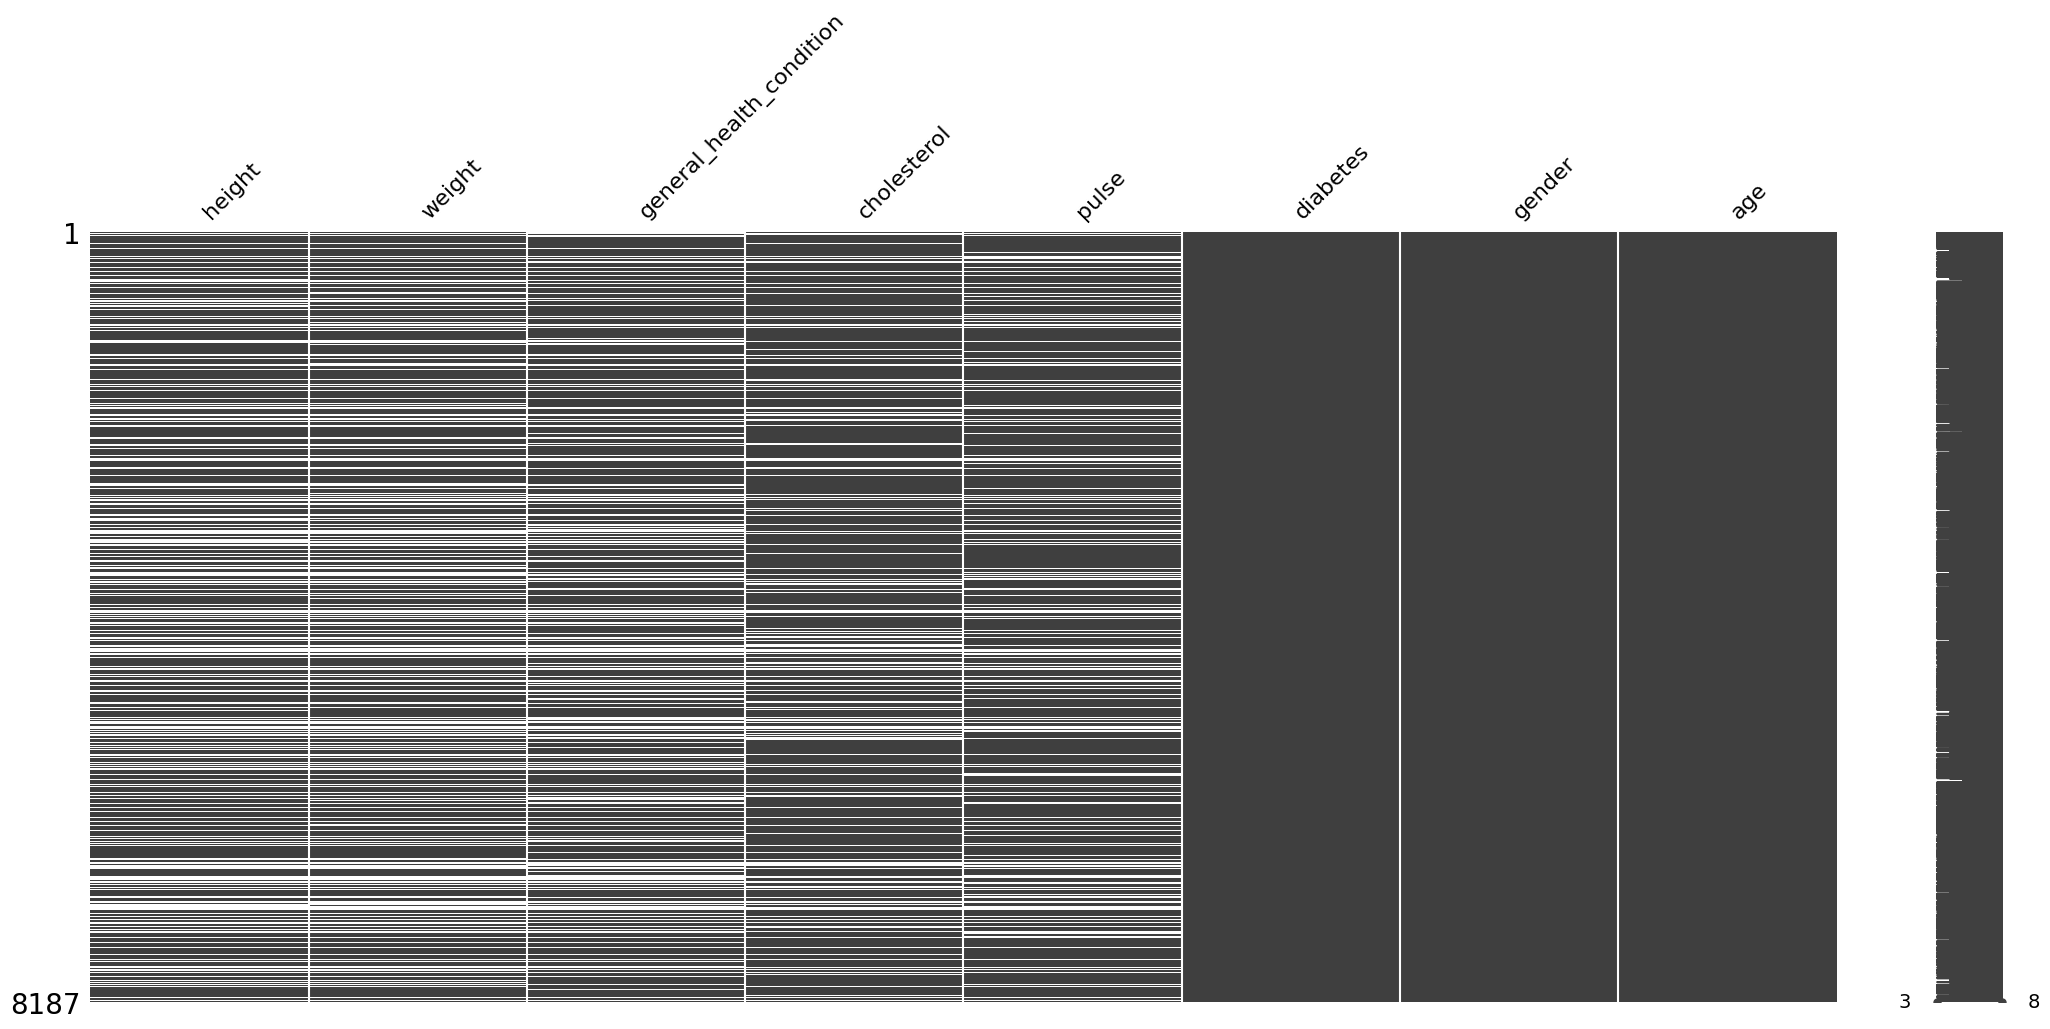

In [43]:
nhanes_df.pipe(msno.matrix)
plt.show()

In [44]:
nhanes_df.dropna(subset = ['pulse', 'cholesterol', 'general_health_condition', 'weight' , 'height'], how = 'all', inplace = True)
nhanes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7157 entries, 93705.0 to 102956.0
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    5488 non-null   float64
 1   weight                    5553 non-null   float64
 2   general_health_condition  5797 non-null   object 
 3   cholesterol               6565 non-null   float64
 4   pulse                     6570 non-null   float64
 5   diabetes                  7157 non-null   int64  
 6   gender                    7157 non-null   object 
 7   age                       7157 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 503.2+ KB


In [45]:
nhanes_df.transform_column('height', lambda s: s.fillna(s.mean().round()),elementwise = False)

,height,weight,general_health_condition,cholesterol,pulse,diabetes,gender,age
SEQN,,,,,,,,
93705.0,63.0,165.0,Good,157.0,52.0,0,Female,66.0
93706.0,68.0,145.0,Very good,148.0,82.0,0,Male,18.0
93707.0,66.0,NaN,Good,189.0,100.0,0,Male,13.0
93709.0,62.0,200.0,NaN,176.0,74.0,0,Female,75.0
93711.0,69.0,142.0,Very good,238.0,62.0,0,Male,56.0
...,...,...,...,...,...,...,...,...
102949.0,72.0,180.0,Excellent,201.0,96.0,0,Male,33.0
102953.0,65.0,218.0,Fair or,182.0,78.0,0,Male,42.0
102954.0,66.0,150.0,Good,172.0,78.0,0,Female,41.0


In [46]:
nhanes_df.select_columns('height', 'weight').missing.bind_shadow_matrix(True, False).assign(heihgt = lambda df: df.height.fillna(value = df.height.mean().round()),weight = lambda df: df.weight.fillna(value = df.weight.mean().round()))
#estamos identificando que valor fue imputado por la media, lo estamos tratando como Mcar pero no es definitivo todavía

,height,weight,height_NA,weight_NA,heihgt
SEQN,,,,,
93705.0,63.0,165.0,False,False,63.0
93706.0,68.0,145.0,False,False,68.0
93707.0,NaN,178.0,True,True,66.0
93709.0,62.0,200.0,False,False,62.0
93711.0,69.0,142.0,False,False,69.0
...,...,...,...,...,...
102949.0,72.0,180.0,False,False,72.0
102953.0,65.0,218.0,False,False,65.0
102954.0,66.0,150.0,False,False,66.0


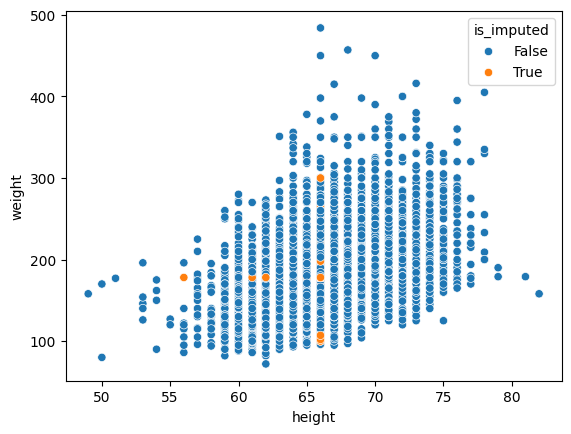

In [47]:
nhanes_df.select_columns('height','weight').missing.bind_shadow_matrix(True,False, suffix="_imp").assign(height = lambda df: df.height.fillna(value = df.height.mean().round()),weight = lambda df: df.weight.fillna(value=df.weight.mean().round())).missing.scatter_imputation_plot(x='height',y='weight')
plt.show()

In [48]:
categorical_columns = nhanes_df.select_dtypes(include = 'object').columns
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(),
                                                                   categorical_columns), remainder = 'passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['general_health_condition', 'gender'], dtype='object'))])

In [49]:
nhanes_transformed_df =  pd.DataFrame(categorical_transformer.fit_transform(nhanes_df), 
                                      columns = categorical_transformer.get_feature_names_out(),
                                      index = nhanes_df.index).rename_columns(function = lambda x: x.removeprefix('ordinalencoder__')).rename_columns(function = lambda x: x.removeprefix('remainder__'))
nhanes_transformed_df

,general_health_condition,gender,height,weight,cholesterol,pulse,diabetes,age
SEQN,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,2.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
93709.0,NaN,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


In [50]:
knn_imputer = sklearn.impute.KNNImputer()#se sugiere q la cantidad de vecinos se impar
nahnes_knn_df = pd.DataFrame(knn_imputer.fit_transform(nhanes_transformed_df).round(),
                             columns = nhanes_transformed_df.columns,
                             index = nhanes_transformed_df.index)
nahnes_knn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7157 entries, 93705.0 to 102956.0
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   general_health_condition  7157 non-null   float64
 1   gender                    7157 non-null   float64
 2   height                    7157 non-null   float64
 3   weight                    7157 non-null   float64
 4   cholesterol               7157 non-null   float64
 5   pulse                     7157 non-null   float64
 6   diabetes                  7157 non-null   float64
 7   age                       7157 non-null   float64
dtypes: float64(8)
memory usage: 503.2 KB


In [51]:
knn_imputer_shadow_matrix = pd.concat([nahnes_knn_df, nhanes_df.missing.create_shadow_matrix(True, False, suffix = '_imp', only_missing = True)], axis = 1)
knn_imputer_shadow_matrix

,general_health_condition,gender,height,weight,cholesterol,pulse,diabetes,age,height_imp,weight_imp,general_health_condition_imp,cholesterol_imp,pulse_imp
SEQN,,,,,,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0,False,False,False,False,False
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0,False,False,False,False,False
93707.0,2.0,1.0,69.0,130.0,189.0,100.0,0.0,13.0,True,True,False,False,False
93709.0,2.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0,False,False,True,False,False
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0,False,False,False,False,False
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0,False,False,False,False,False
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0,False,False,False,False,False


<Axes: xlabel='height', ylabel='weight'>

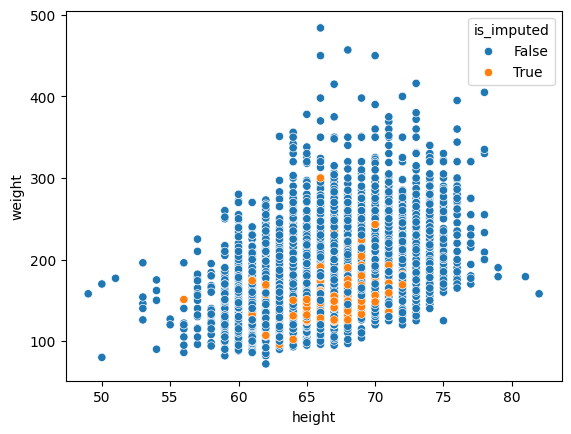

In [52]:
knn_imputer_shadow_matrix.missing.scatter_imputation_plot(x = 'height', y = 'weight')

# Imputacion MICE
(Multivariate Imputation by Chained Equations)
se trata de un ejercicio iterativo que busca en cada iteracion mejorar la imputacion del dato nulo.
Es decir, usa imputaciones previas para mejorar imputaciones futuras
Utiliza el BayesialRidge(Regression Lineal)

*Caracteristicas:*
1. Preserva las relaciones entre las variables de los datos creados
2. Reduce el sesgo generado por otros metodos de imputacion
3. Su flexibilidad permite imputar datos MAR y MNAR
4. Es un metodo exhaustivo, por lo que opera correctamente para altas cantidades de datos y altas cantidades de datos nulos

*Algoritmo*
1. Requiere la cantidad de iteraciones, mecanismo de inicio y modelo base
(Mecanismo de incio: el primer esquema de imputación de datos, va a ser con la medida de tendencia central)
2. Genera tantas copias como iteraciones de los datos crudos
3. Imputación inicial con la medida de tendencia central
4. Toma de la variable que se quiere imputar,revela sus datos nulos y mantiene los no nulos.
5. Construye un modelo de datos para la columna a imputar por medio de los demás, e imputa los valores faltantes.
6. Ejecuta los pasos previos para las demás columnas. 
7. Realiza todo el proceso hasta que se cumplan las iteraciones. 

Ejemplo Imputación MICE (Imputación Multivariada por Ecuaciones Encadenadas)

In [53]:
nice_imputer = sklearn.impute.IterativeImputer(estimator = BayesianRidge(),
                                               initial_strategy= 'mean',
                                                max_iter = 10)
nhanes_mice_df = pd.DataFrame(nice_imputer.fit_transform(nhanes_transformed_df).round(),
                              columns = nhanes_transformed_df.columns,
                              index = nhanes_transformed_df.index)
nhanes_mice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7157 entries, 93705.0 to 102956.0
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   general_health_condition  7157 non-null   float64
 1   gender                    7157 non-null   float64
 2   height                    7157 non-null   float64
 3   weight                    7157 non-null   float64
 4   cholesterol               7157 non-null   float64
 5   pulse                     7157 non-null   float64
 6   diabetes                  7157 non-null   float64
 7   age                       7157 non-null   float64
dtypes: float64(8)
memory usage: 503.2 KB


In [54]:
mice_imputer_shadow_matrix = pd.concat([nhanes_mice_df, nhanes_df.missing.create_shadow_matrix(True, False, suffix = '_imp', only_missing = True)], axis = 1)
mice_imputer_shadow_matrix

,general_health_condition,gender,height,weight,cholesterol,pulse,diabetes,age,height_imp,weight_imp,general_health_condition_imp,cholesterol_imp,pulse_imp
SEQN,,,,,,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0,False,False,False,False,False
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0,False,False,False,False,False
93707.0,2.0,1.0,70.0,200.0,189.0,100.0,0.0,13.0,True,True,False,False,False
93709.0,2.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0,False,False,True,False,False
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0,False,False,False,False,False
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0,False,False,False,False,False
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0,False,False,False,False,False


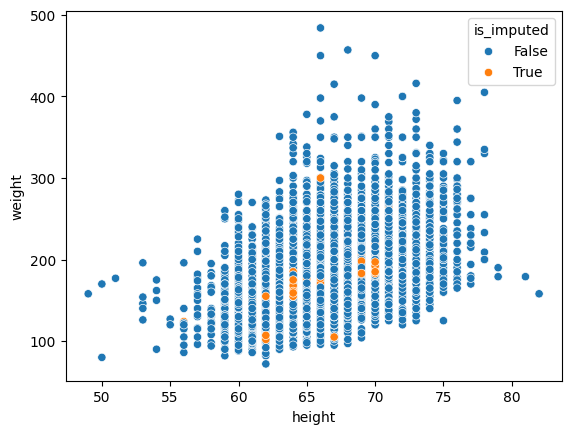

In [55]:
mice_imputer_shadow_matrix.missing.scatter_imputation_plot(x = 'height', y = 'weight')  
plt.show()

RandomForest

In [56]:
mice_imputer = sklearn.impute.IterativeImputer(estimator = RandomForestRegressor(),
                                               initial_strategy= 'mean',
                                                max_iter = 10)
nhanes_mice_df = pd.DataFrame(mice_imputer.fit_transform(nhanes_transformed_df).round(),
                              columns = nhanes_transformed_df.columns,
                              index = nhanes_transformed_df.index)
nhanes_mice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7157 entries, 93705.0 to 102956.0
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   general_health_condition  7157 non-null   float64
 1   gender                    7157 non-null   float64
 2   height                    7157 non-null   float64
 3   weight                    7157 non-null   float64
 4   cholesterol               7157 non-null   float64
 5   pulse                     7157 non-null   float64
 6   diabetes                  7157 non-null   float64
 7   age                       7157 non-null   float64
dtypes: float64(8)
memory usage: 503.2 KB


In [57]:
mice_imputer_shadow_matrix = pd.concat([nhanes_mice_df, nhanes_df.missing.create_shadow_matrix(True, False, suffix = '_imp', only_missing = True)], axis = 1)
mice_imputer_shadow_matrix

,general_health_condition,gender,height,weight,cholesterol,pulse,diabetes,age,height_imp,weight_imp,general_health_condition_imp,cholesterol_imp,pulse_imp
SEQN,,,,,,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0,False,False,False,False,False
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0,False,False,False,False,False
93707.0,2.0,1.0,69.0,246.0,189.0,100.0,0.0,13.0,True,True,False,False,False
93709.0,2.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0,False,False,True,False,False
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0,False,False,False,False,False
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0,False,False,False,False,False
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0,False,False,False,False,False


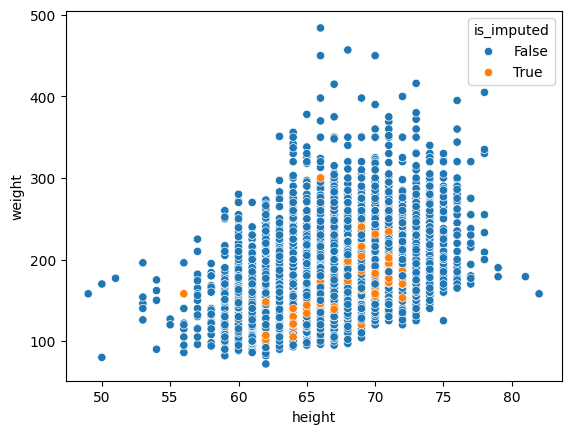

In [58]:
mice_imputer_shadow_matrix.missing.scatter_imputation_plot(x = 'height', y = 'weight')  
plt.show()

In [59]:
nhanes_imputed_df = nhanes_mice_df
nhanes_imputed_df[categorical_columns] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = nhanes_mice_df[categorical_columns]))